In [2]:
from IPython.display import Image

# Interpret Machine Learning Models and Build Trust

## Python Libraries for Building Interpretable Machine Learning Models
### Here are the 6 Python libraries we’ll be discussing in this article:

- ELI5
- LIME
- SHAP
- Yellowbrick
- Alibi
- Lucid

### 1. Interpreting Machine Learning Models using ELI5
- ELI5 is an acronym for ‘Explain like I am a 5-year old’.  This aptly named Python library has the functionality to explain most machine learning models. Interpreting a machine learning model has two main ways of looking at it:

- Global Interpretation: Look at a model’s parameters and figure out at a global level how the model works
- Local Interpretation: Look at a single prediction and identify features leading to that prediction
- For Global Interpretation, ELI5 has:

In [ ]:
eli5.show_weights(clf) # clf is the model fitted 

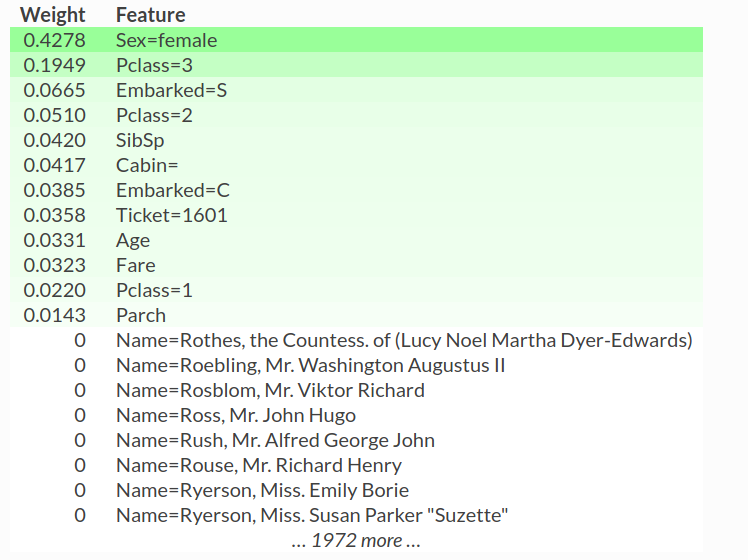

In [4]:
Image(filename='./Image/eli5_global.png') 

For Local Interpretation, ELI5 has:

In [ ]:
eli5.show_predictions(clf, X_train.iloc[1], feature_names = list(X.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

As we can see, we get the prediction for only the first record in our training data:

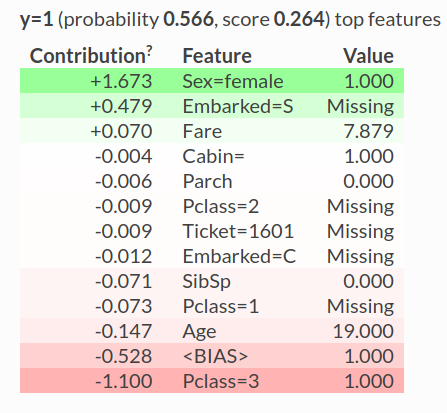

In [5]:
Image(filename='./Image/eli5_local.png') 

One of the highlights of the ELI5 library is that it already provides support for popular libraries like scikit-learn, XGBoost, Keras, etc.

We can also use ELI5 for text data! It has a special module for explaining text classification models, called the TextExplainer. Another highlight is the formatter module where we can generate HTML, JSON or even Pandas dataframe versions of our explanation. This makes it easy to integrate the explanation in our machine learning pipeline as well.

Official ELI5 Documentation: https://eli5.readthedocs.io/en/latest/index.html#

### 2. Interpreting Machine Learning Models using LIME
Ponder this – would you just pull up a review of a movie from some random person and watch it if the person recommends it? No, right? You would read what a well-known movie-critic has to say about the movie and then make a decision. This is because you trust the movie critic’s opinion.

Similarly, according to the authors of LIME, the keyword for building a machine learning model is trust.

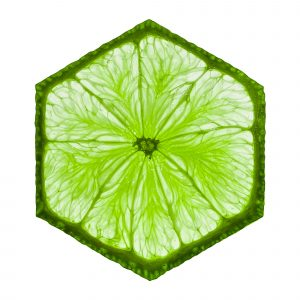

In [6]:
Image(filename='./Image/LIME-models-300x300.jpg')

Getting the best predictions on a machine learning model is not the end goal, is it? The end goal is making decisions based on these predictions and this is where humans come in. The humans/decision-makers need to trust the model and the predictions in order to make the decision – especially in life and death situations or where a lot of money is concerned.

The idea behind LIME (Local Interpretable Model-Agnostic Explanations) is to provide the reasons why a prediction was made. Taking the same example, if a machine learning model predicts that a movie is going to be a blockbuster, LIME highlights the characteristics of the movie that would make it a super hit. Features like genre and actor might contribute to the movie doing well, while others like running time, director, etc. might work against it.

The creators of LIME outline four basic criteria for explanations that must be satisfied:

Interpretable: The explanation must be easy to understand depending on the target demographic
Local fidelity: The explanation should be able to explain how the model behaves for individual predictions
Model-agnostic: The method should be able to explain any model
Global perspective: The model, as a whole, should be considered while explaining it
These are excellent criteria to go by and we can use them for machine learning model interpretability in general.

The syntax for using LIME is:

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names, 
                    class_names, categorical_features, mode)

# np.array(X_train): The training data
# class_names: The target variable(for regression), different classes in the target 
variable(for regression)
# categorical_features: List of all the column names which are categorical
# mode: For a regression problem: 'regression', and 
for a classification problem, 'classification

The above example is for tabular data (only numerical or categorical).

For individual predictions:

In [ ]:
exp = explainer.explain_instance(data_row, predict_function)
exp.as_pyplot_figure() #to viusalise the explanations

#data_row: the individual test datapoint which we want to predict
#predict_function: The prediction model


We can use LIME for image and text data as well:

In [ ]:
explainer = lime_image.LimeImageExplainer()
# or
explainer = lime_image.LimeTextExplainer()

Here is a list of functions which you can use for image data: Image Data with LIME https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_image
Working with text data and LIME: Text Data documentation https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_text

### 3. Interpreting Machine Learning Models using SHAP
The ‘SHapley Additive exPlanations’ Python library, better knows as the SHAP library, is one of the most popular libraries for machine learning interpretability. The SHAP library uses Shapley values at its core and is aimed at explaining individual predictions.

But wait – what are Shapley values? Simply put, Shapley values are derived from Game Theory, where each feature in our data is a player, and the final reward is the prediction. Depending on the reward, Shapley values tell us how to distribute this reward among the players fairly.

We won’t cover this technique in detail here, but you can refer to this excellent article explaining how Shapley values work: A Unique Method for Machine Learning Interpretability: Game Theory & Shapley Values!

The best part about SHAP is that it offers a special module for tree-based models. Considering how popular tree-based models are in hackathons and in the industry, this module makes fast computations, even considering dependent features.

This is the basic syntax for how to use the SHAP library for individual predictions (tree-based model):

In [ ]:
import shap

# Need to load JS visualisation in the notebook
shap.initjs()

#assuming we are using XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[i], 
feature_names=X_train.columns)
# i: id of the individual record

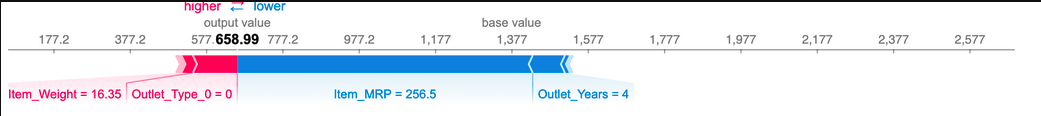

In [7]:
Image(filename='./Image/shap.png')

Though SHAP attempts to explain individual predictions, we can also use it to explain global predictions:

In [ ]:
shap.summary_plot(shap_values, features, feature_names)
#features: Our training set of independent variables
#feature_names: list of column names from the above training set

SHAP GitHub Repo https://github.com/slundberg/shap

### 4. Interpreting Machine Learning Models using Yellowbrick
The Yellowbrick library is based on the scikit-learn and matplotlib libraries. This makes it compatible with most of scikit-learn’s models. We can even use the same parameters that we used in our machine learning models (based on scikit-learn, of course)

Yellowbrick uses the concept of ‘Visualisers’. Visualizers are a set of tools that help us visualize the features in our data considering individual datapoints. Think of it as a dashboard for all your features. The main Visualisers offered by Yellowbrick are:

- Rank Features: To visualize individual features and their correlation with other features
- RadViz Visualizer: To visualize the separability between classes
- Parallel Coordinates: To visualize the distribution of the target class with respect to other features
- PCA Projection: Visualizing combined/higher dimensions using Principal Component Analysis (PCA)
- Manifold Visualization: Visualizing the data using manifold learning (like t-SNE)
- Direct Data Visualization/Joint Plot Visualiser: To visualize the relationship between the individual features and the target variable

Using these Visualizers is a very simple 4-line process. The syntax is similar to how we use the transformer in scikit-learn.

For example:

In [ ]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['col1', 'col2'])
visualizer.fit_transform(X, y)
visualizer.show()

# col1 and col2 are the 2 columns we want to explore.
# X is the independent variables
# y is the target variable

Yellowbrick Official Documentation https://www.scikit-yb.org/en/latest/quickstart.html

### 5. Interpreting Machine Learning Models using Alibi
Alibi is an open-source Python library based on instance-wise explanations of predictions (instance, in this case, means individual data-points). This library comprises of different types of explainers depending on the kind of data we are dealing with. Here is a handy table by the creators themselves:

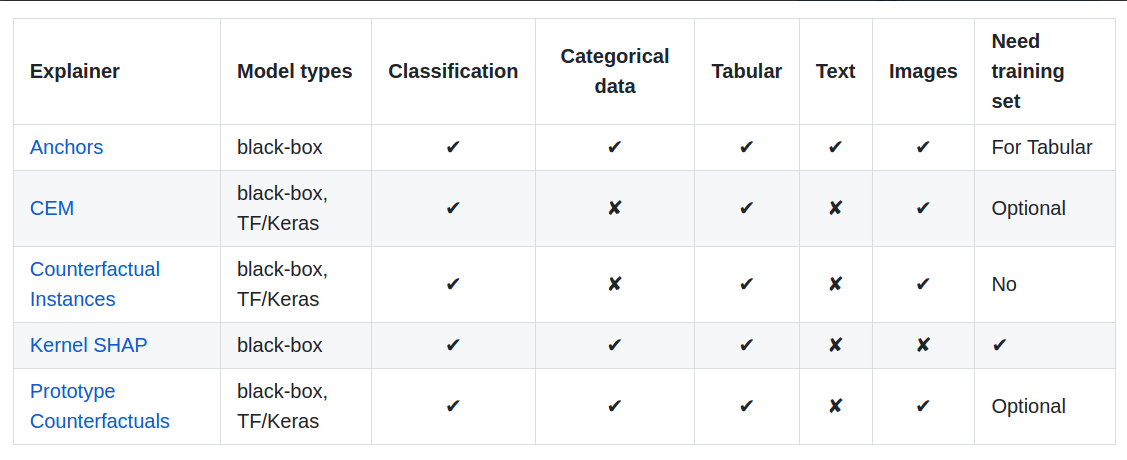

In [10]:
Image(filename='./Image/Alibi.png')

As you can see, the library offers different types of Explainer models based on different techniques. While we won’t go into detail about each of them, it is important to note that the library is specifically designed for black-box models. Essentially, you just need the model predictions at the end to use the library. This is particularly useful when we won’t want to tamper with the workflow of our machine learning model.

Installing Alibi installs a bunch of other useful libraries (as a part of its dependency) like scikit-learn, Pandas, spaCy, TensorFlow,  and many more. This would make it particularly useful for deep learning models.

Here’s an example of one of the Explainers (let’s use the kernel SHAP since we have already explored this above):

In [ ]:
from alibi.explainers import KernelShap

explainer = KernelShap(prediction_function)
explainer.fit(X_train)

explanation = explainer.explain(X_test)

#prediction_function: The predcition function
#X_train: Training set of independendent variables
X_test: Test set of independendent variables

Alibi Official Documentation https://docs.seldon.io/projects/alibi/en/latest/overview/getting_started.html

### 6. Interpreting Machine Learning Models using Lucid
As deep learning becomes more and more mainstream across the industry, the need for explaining these deep learning models becomes imperative. However, this can become particularly challenging considering the large number of features we have to deal with.

The Lucid library aims to fill this void by providing tools for visualizing neural networks. The best part? You can visualize neural networks without any prior setup!

Developed by a group of researchers and maintained by volunteers, Lucid is expressly devoted to working with neural networks and deep learning models. It consists of Modelzoo, a component already preloaded with various deep learning models.

This is how you can visualize a neuron (we have taken Inceptionv1):

In [ ]:
import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

#loading the model
model = models.InceptionV1()
model.load_graphdef()

# Visualising the neuron
_ = render.render_vis(model, layer)

#layer can be any layer in your Inception model like con1d, conv2d, maxpool10, etc.

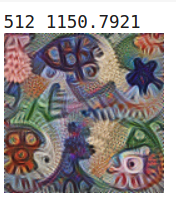

In [12]:
Image(filename='./Image/Lucid.png')

There are different parameters we can experiment with, like the effect of using transformed data, visualizing specific channels, etc.

The GitHub Repository of Lucid (https://github.com/tensorflow/lucid#community) includes ready-to-run Google Colab notebooks we can use easily. However, a couple of caveats before you dive in:

- They work with only TensorFlow 1.0 so far
- Though the notebooks cover each example thoroughly, there is yet to be a rich documentation source like the libraries we’ve covered above

Despite these restrictions, Lucid is a superb library intended for students and researchers alike who want to study neural networks in detail. Considering the popularity of neural networks and deep learning, this space is one to watch!

### End Notes
There are many more really good Python libraries in this domain and I urge you to explore them. As machine learning and deep learning become more mainstream in the industry, so does the need for interpretability. It is important to convey the predictions made by your model to all the stakeholders in order to make the correct decisions. Thus, such tools and libraries are the need of the hour in industry and in research.